## **CONFIGURAÇÃO INCIAL**

Esta é a parte inicial de importar o dataframe, conectar ao drive etc.

In [623]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import statistics
import math
from scipy import stats
from collections import Counter
warnings.filterwarnings("ignore", category=FutureWarning)

sns.set()

In [624]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [625]:
df = pd.read_csv('/content/drive/MyDrive/dados/FelicidadeVsCorrupcao.csv', encoding='utf-8', sep=',')

## **LIMPEZA DOS DADOS**

Como peguei um novo dataframe foi necessario fazer uma nova limpeza nele.

A seguir temos o dataframe original

In [626]:
df

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


Todas as colunas do dataframe original

In [627]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


Comecei então traduzindo as colunas para melhor entendimento

In [628]:
df = df.rename(columns={'Country': 'País','happiness_score':'Pontuação felicidade','gdp_per_capita':'PIB','family':'Familia','health':'Saúde','freedom':'Liberdade','generosity':'Generosidade',
'government_trust':'Confiablidade do governo','dystopia_residual':'Distopia residual','continent':'Continente','Year':'Ano','social_support':'Suporte social','cpi_score':'CPI pontuação'})
df

,País,Pontuação felicidade,PIB,Familia,Saúde,Liberdade,Generosidade,Confiablidade do governo,Distopia residual,Continente,Ano,Suporte social,CPI pontuação
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


Aqui considerei dropar alhimas colunas para ter um melhor resultado no codigo de aprendizado.

In [629]:
list_drop_columns = [
'País','Continente','Ano','Suporte social','Confiablidade do governo','Familia','Generosidade']
df2 = df.drop(columns=list_drop_columns)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pontuação felicidade  792 non-null    float64
 1   PIB                   792 non-null    float64
 2   Saúde                 792 non-null    float64
 3   Liberdade             792 non-null    float64
 4   Distopia residual     792 non-null    float64
 5   CPI pontuação         792 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 37.2 KB


Arredondei os valores para 3 casas para então multiplicar por 1000 e ter o valor integral em inteiro sem perder seu peso.

In [630]:
df2 = df2.round({"Pontuação felicidade":3,"PIB":3,"Saúde":3,"Liberdade":3,"Distopia residual":3})

In [631]:
df2.head()

,Pontuação felicidade,PIB,Saúde,Liberdade,Distopia residual,CPI pontuação
0,7.537,1.616,0.797,0.635,2.277,88
1,7.522,1.482,0.793,0.626,2.314,91
2,7.504,1.481,0.834,0.627,2.323,79
3,7.494,1.565,0.858,0.620,2.277,86
4,7.469,1.444,0.809,0.618,2.430,90


Vou multiplicar todas as colunas para poder ter os valores em int :)

In [632]:
df2['Pontuação felicidade'] = df2['Pontuação felicidade'] * 1000
df2['PIB'] = df2['PIB'] * 1000
df2['Saúde'] = df2['Saúde'] * 1000
df2['Liberdade'] = df2['Liberdade'] * 1000
df2['Distopia residual'] = df2['Distopia residual'] * 1000
df2['CPI pontuação'] = df2['CPI pontuação'] * 1000

Transformando os valores todos em inteiro.

In [633]:
df2['Pontuação felicidade'] = df2['Pontuação felicidade'].astype(int)
df2['PIB'] = df2['PIB'].astype(int)
df2['Saúde'] = df2['Saúde'].astype(int)
df2['Liberdade'] = df2['Liberdade'].astype(int)
df2['Distopia residual'] = df2['Distopia residual'].astype(int)
df2['CPI pontuação'] = df2['CPI pontuação'].astype(int)

In [634]:
df2.head()

,Pontuação felicidade,PIB,Saúde,Liberdade,Distopia residual,CPI pontuação
0,7537,1616,797,635,2277,88000
1,7522,1482,793,626,2314,91000
2,7504,1481,834,627,2323,79000
3,7494,1565,858,620,2277,86000
4,7469,1444,809,618,2430,90000


In [635]:
df2.shape

(792, 6)

Aqui criei uma nova coluna para simplificar a pontuação de felicidade.

In [636]:
# criando nova coluna
df2['Feliz?'] = 'NaN'

In [637]:
df2.describe()

,Pontuação felicidade,PIB,Saúde,Liberdade,Distopia residual,CPI pontuação
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5473.306818,929.200758,648.685606,427.000000,1379.260101,44327.020202
std,1124.737973,385.787256,232.248909,148.009661,1075.271634,19508.833027
min,2567.000000,0.000000,0.000000,0.000000,0.000000,11000.000000
25%,4590.750000,644.250000,510.250000,325.750000,0.000000,30000.000000
50%,5485.500000,995.000000,685.500000,439.500000,1732.000000,38000.000000
75%,6300.500000,1229.000000,815.500000,546.250000,2237.000000,57000.000000
max,7809.000000,2096.000000,1141.000000,724.000000,3602.000000,91000.000000


Abaixo estabeleci que se tiver uma pontuação felicidade a partir de 5500 o país é considerado feliz, se não é considerado não feliz. (Para podermos prever mais a frente de forma mais simplificada)

In [638]:
df2.loc[df2['Pontuação felicidade'] >= 5500, 'Feliz?'] = 0

In [639]:
df2.loc[df2['Pontuação felicidade'] < 5500, 'Feliz?'] = 1

In [640]:
df2['Feliz?'] = df2['Feliz?'].astype(int)

In [641]:
df2.head()

,Pontuação felicidade,PIB,Saúde,Liberdade,Distopia residual,CPI pontuação,Feliz?
0,7537,1616,797,635,2277,88000,0
1,7522,1482,793,626,2314,91000,0
2,7504,1481,834,627,2323,79000,0
3,7494,1565,858,620,2277,86000,0
4,7469,1444,809,618,2430,90000,0


In [642]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Pontuação felicidade  792 non-null    int64
 1   PIB                   792 non-null    int64
 2   Saúde                 792 non-null    int64
 3   Liberdade             792 non-null    int64
 4   Distopia residual     792 non-null    int64
 5   CPI pontuação         792 non-null    int64
 6   Feliz?                792 non-null    int64
dtypes: int64(7)
memory usage: 43.4 KB


## **LEGENDA**


País = Nome do país.

Pontuação felicidade = Pontuação de felicidade 0 - 10.

PIB = Quanto o PIB do país contibrui para o calculo de felicidade.

Familia = Quanto a família contibrui para o calculo de felicidade.e.

Saúde = Quanto a saúde contibrui para o calculo de felicidade.

Liberdade = Quanto a liberdade contibrui para o calculo de felicidade.

Generosidade = Quanto a generosidade contibrui para o calculo de felicidade.

Confiablidade do governo = Quanto a confiabilidade do governo contibrui para o calculo de felicidade.

Distopia residual = Pontuação baseada na hipotetica comparação com o país mais triste do mundo.

Continente = Continente do país.

Ano = Ano da pesquisa

Suporte social = O quanto a pessoa é cuidada.

CPI pontuação = Percepção de corrupção (Quanto maior, melhor).

Feliz? = 0 - Feliz, 1 - Não feliz

## **ÁRVORES DE DECISÃO**

### **ATRIBUTOS PREVISORES E ALVO**

In [643]:
df2.head()

,Pontuação felicidade,PIB,Saúde,Liberdade,Distopia residual,CPI pontuação,Feliz?
0,7537,1616,797,635,2277,88000,0
1,7522,1482,793,626,2314,91000,0
2,7504,1481,834,627,2323,79000,0
3,7494,1565,858,620,2277,86000,0
4,7469,1444,809,618,2430,90000,0


São definidos os previsores, optei por pegar do PIB até o CPI pontuação, pegar a pontuação felicidade pode levar a overfitting.

In [644]:
# Definindo os previsores
previsores = df2.iloc[:, 2:6].values

In [645]:
previsores

array([[  797,   635,  2277, 88000],
       [  793,   626,  2314, 91000],
       [  834,   627,  2323, 79000],
       ...,
       [  572,   604,   548, 54000],
       [  375,   377,   841, 24000],
       [  266,     0,  1507, 19000]])

In [646]:
previsores.shape

(792, 4)

Para prever o alvo será o "Feliz?" será indicado se o país é ou não feliz a partir dos previsores.

In [647]:
# Definindo o alvo, eu escolherei a coluna "Feliz?"
alvo = df2.iloc[:, 6].values

In [648]:
alvo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [649]:
alvo.shape

(792,)

### **ANÁLISE DAS ESCALAS DOS ATRIBUTOS (ESCALONAMENTO)**

Padronização (utiliza a média e o desvio padrão como referência).

In [650]:
df2.describe()

,Pontuação felicidade,PIB,Saúde,Liberdade,Distopia residual,CPI pontuação,Feliz?
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5473.306818,929.200758,648.685606,427.000000,1379.260101,44327.020202,0.503788
std,1124.737973,385.787256,232.248909,148.009661,1075.271634,19508.833027,0.500302
min,2567.000000,0.000000,0.000000,0.000000,0.000000,11000.000000,0.000000
25%,4590.750000,644.250000,510.250000,325.750000,0.000000,30000.000000,0.000000
50%,5485.500000,995.000000,685.500000,439.500000,1732.000000,38000.000000,1.000000
75%,6300.500000,1229.000000,815.500000,546.250000,2237.000000,57000.000000,1.000000
max,7809.000000,2096.000000,1141.000000,724.000000,3602.000000,91000.000000,1.000000


In [651]:
from sklearn.preprocessing import StandardScaler

In [652]:
previsores_esc = StandardScaler().fit_transform(previsores)

In [653]:
previsores_esc

array([[ 0.63900457,  1.40620171,  0.8354235 ,  2.24004056],
       [ 0.62177079,  1.34535644,  0.86985515,  2.39391423],
       [ 0.79841708,  1.35211703,  0.87823042,  1.77841955],
       ...,
       [-0.3303958 ,  1.19662357, -0.77355838,  0.49613897],
       [-1.17915969, -0.33802926, -0.50089691, -1.04259773],
       [-1.64878031, -2.88676985,  0.11887286, -1.29905385]])

In [654]:
previsoresdf = pd.DataFrame(previsores_esc)
previsoresdf

,0,1,2,3
0,0.639005,1.406202,0.835423,2.240041
1,0.621771,1.345356,0.869855,2.393914
2,0.798417,1.352117,0.878230,1.778420
3,0.901820,1.304793,0.835423,2.137458
4,0.690706,1.291272,0.977803,2.342623
...,...,...,...,...
787,-0.666455,0.554368,-1.044359,0.803886
788,-0.886185,0.554368,-0.614428,-0.324521
789,-0.330396,1.196624,-0.773558,0.496139
790,-1.179160,-0.338029,-0.500897,-1.042598


### **RESUMO PRÉ-PROCESSAMENTO**

alvo = variável que se pretende atingir (tem ou não doença cardíaca).

previsores = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas manualmente, sem escalonar.

previsores_esc = conjunto de variáveis previsoras com as variáveis categóricas transformadas em numéricas, escalonada.

### **BASE DE TREINO E TESTE**

Parâmetros train_test_split:   
- arrays: nomes dos atributos previsores e alvo.   
- test_size: tamanho em porcentagem dos dados de teste. default é none.   
- train_size: tamanho em porcentagem dos dados de treinamento.default é none.  
- random_state: nomeação de um estado aleatório.   
- shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
- stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

In [655]:
from sklearn.model_selection import train_test_split

In [656]:
x_treino, x_teste, y_treino, y_teste = train_test_split(previsores_esc, alvo, test_size = 0.4, random_state = 0)

In [657]:
x_treino.shape

(475, 4)

In [658]:
x_teste.shape

(317, 4)

In [659]:
y_treino.shape

(475,)

In [660]:
y_teste.shape

(317,)

### **ÁRVORE DE DECISÃO**

In [661]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [682]:
arvore = DecisionTreeClassifier(criterion='entropy', random_state = 0, max_depth=3)
_arvore = arvore.fit(x_treino, y_treino)

Aqui plotamos a arvore com profundidade 3, foi o melhor resultado que encontrei.

[Text(0.4230769230769231, 0.875, 'X[0] <= -0.257\nentropy = 1.0\nsamples = 475\nvalue = [242, 233]'),
 Text(0.15384615384615385, 0.625, 'X[0] <= -0.772\nentropy = 0.45\nsamples = 149\nvalue = [14, 135]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 98\nvalue = [0, 98]'),
 Text(0.23076923076923078, 0.375, 'X[2] <= 1.371\nentropy = 0.848\nsamples = 51\nvalue = [14, 37]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.747\nsamples = 47\nvalue = [10, 37]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.6923076923076923, 0.625, 'X[3] <= 0.265\nentropy = 0.882\nsamples = 326\nvalue = [228, 98]'),
 Text(0.5384615384615384, 0.375, 'X[2] <= 0.796\nentropy = 0.999\nsamples = 185\nvalue = [95, 90]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.975\nsamples = 140\nvalue = [57, 83]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.624\nsamples = 45\nvalue = [38, 7]'),
 Text(0.8461538461538461, 0.375, 'X[2] <= 0.385\nentropy = 0.314\nsampl

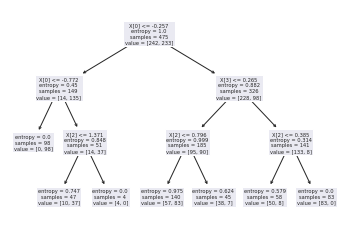

In [683]:
tree.plot_tree(_arvore)

In [684]:
previsoes_arvore = arvore.predict(x_teste)
previsoes_arvore

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [685]:
y_teste

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [686]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Conseguimos uma acurácia de 82,97% no teste.

In [687]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_arvore) * 100.0))

Acurácia: 82.97%


In [688]:
confusion_matrix(y_teste, previsoes_arvore)

array([[112,  39],
       [ 15, 151]])

In [689]:
print(classification_report(y_teste, previsoes_arvore))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       151
           1       0.79      0.91      0.85       166

    accuracy                           0.83       317
   macro avg       0.84      0.83      0.83       317
weighted avg       0.84      0.83      0.83       317



### **ANÁLISE DADOS DE TREINO**

In [690]:
previsoes_treino = arvore.predict(x_treino)
previsoes_treino

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,

O treino teve uma acurácia de em torno de 82% também.

In [691]:
accuracy_score(y_treino, previsoes_treino)

0.8273684210526315

In [692]:
confusion_matrix(y_treino, previsoes_treino)

array([[175,  67],
       [ 15, 218]])

###RESUMO ÁRVORE DE DECISÃO:
- TREINO: 82,73%
- TESTE: 82.97%

## **RANDOM FORESTS**

### **ATRIBUTOS PREVISORES E ALVO**

Resolvido no código anterior

### **ANÁLISE DAS ESCALAS DOS ATRIBUTOS (ESCALONAMENTO)**

Resolvido no código anterior

### **BASE DE TREINO E TESTE**

Treinado no codigo anterior

### **RANDOM FOREST**

In [693]:
from sklearn.ensemble import RandomForestClassifier

In [694]:
random = RandomForestClassifier(n_estimators=150, criterion='entropy', random_state = 0, max_depth=3)
random.fit(x_treino, y_treino)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=150,
                       random_state=0)

In [695]:
previsoes_random = random.predict(x_teste)
previsoes_random

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,

In [696]:
y_teste

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [697]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Acurácia ainda maior que a floresta de decisão.

In [698]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_random) * 100.0))

Acurácia: 86.12%


In [703]:
confusion_matrix(y_teste, previsoes_random)

array([[131,  20],
       [ 24, 142]])

In [704]:
print(classification_report(y_teste, previsoes_random))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       151
           1       0.88      0.86      0.87       166

    accuracy                           0.86       317
   macro avg       0.86      0.86      0.86       317
weighted avg       0.86      0.86      0.86       317



*Análise dados de treino*

In [705]:
previsoes_treino = random.predict(x_treino)
previsoes_treino

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,

No de treino tambem maior que do arvore de decisão.

In [707]:
accuracy_score(y_treino, previsoes_treino)

0.8673684210526316

In [708]:
confusion_matrix(y_treino, previsoes_treino)

array([[211,  31],
       [ 32, 201]])

###RESUMO RANDOM FOREST:
- TREINO: 86,73%
- TESTE: 86.12%

## **REGRESSÃO LOGÍSTICA**

In [709]:
from sklearn.linear_model import LogisticRegression

In [710]:
logistica = LogisticRegression(random_state=1, max_iter=500, penalty="l2",
                               tol=0.0001, C=2,solver="lbfgs")
logistica.fit(x_treino, y_treino)

LogisticRegression(C=2, max_iter=500, random_state=1)

In [711]:
logistica.intercept_

array([0.02254589])

In [712]:
logistica.coef_

array([[-1.87699445, -0.8508017 , -0.66957863, -0.46277948]])

In [713]:
previsoes_logistica = logistica.predict(x_teste)
previsoes_logistica

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,

In [714]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Acurácia mediana, entre a random forest e a arvore de desição

In [718]:
print("Acurácia: %.2f%%" % (accuracy_score(y_teste, previsoes_logistica) * 100.0))

Acurácia: 83.91%


In [719]:
confusion_matrix(y_teste, previsoes_logistica)

array([[125,  26],
       [ 25, 141]])

In [720]:
print(classification_report(y_teste, previsoes_logistica))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       151
           1       0.84      0.85      0.85       166

    accuracy                           0.84       317
   macro avg       0.84      0.84      0.84       317
weighted avg       0.84      0.84      0.84       317



Análise dados de treino

In [721]:
previsoes_treino = logistica.predict(x_treino)
previsoes_treino

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [722]:
accuracy_score(y_treino, previsoes_treino)

0.8231578947368421

In [723]:
confusion_matrix(y_treino, previsoes_treino)

array([[199,  43],
       [ 41, 192]])

###RESUMO REGRESSÃO LOGÍSTICA:
- TREINO: 82,31%
- TESTE: 83.91%